In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
rainfall = pd.read_csv("customized_daily_rainfall_data.csv", index_col=0, low_memory=True)

In [15]:
rainfall.head()

,Station,Year,Month,Day,Rainfall
StationIndex,,,,,
1,Dhaka,1970,1,1,0
1,Dhaka,1970,1,2,0
1,Dhaka,1970,1,3,0
1,Dhaka,1970,1,4,0
1,Dhaka,1970,1,5,0


In [16]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542376 entries, 1 to 35
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Station   542376 non-null  object
 1   Year      542376 non-null  int64 
 2   Month     542376 non-null  int64 
 3   Day       542376 non-null  int64 
 4   Rainfall  542376 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 24.8+ MB


In [17]:
rainfall.isnull().sum()

Station     0
Year        0
Month       0
Day         0
Rainfall    0
dtype: int64

In [18]:
rainfall.duplicated().sum()

0

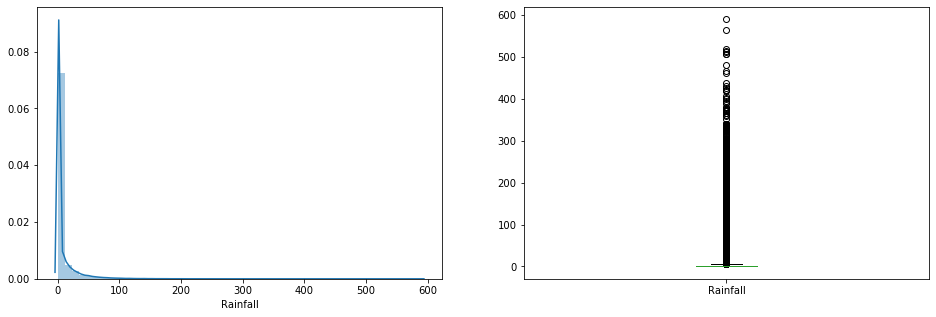

In [20]:
plt.subplot(121)
sns.distplot(rainfall['Rainfall'])

plt.subplot(122)
rainfall["Rainfall"].plot.box(figsize=(16,5))

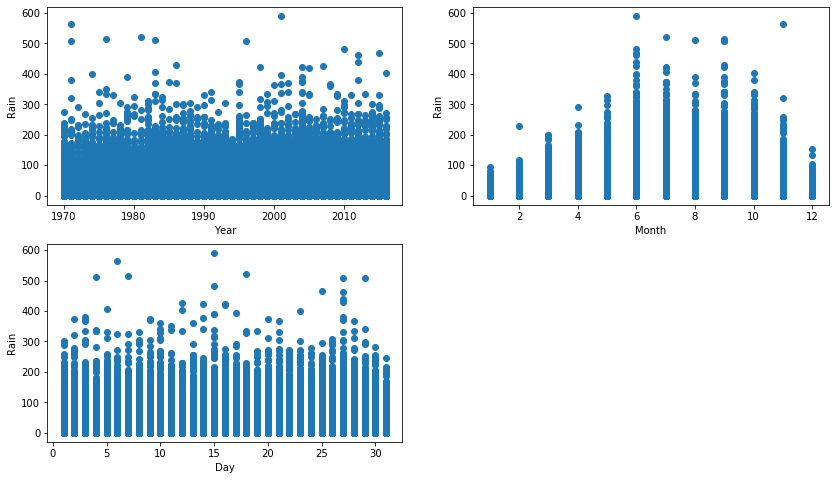

In [22]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.scatter(x=rainfall["Year"], y=rainfall["Rainfall"])
plt.xlabel("Year")
plt.ylabel("Rain")

plt.subplot(2,2,2)
plt.scatter(x=rainfall["Month"], y=rainfall["Rainfall"])
plt.xlabel("Month")
plt.ylabel("Rain")

plt.subplot(2,2,3)
plt.scatter(x=rainfall["Day"], y=rainfall["Rainfall"])
plt.xlabel("Day")
plt.ylabel("Rain")

plt.show()

In [23]:
# checking correlation
corr = rainfall[["Year", "Month", "Day", "Rainfall"]].corr()

In [24]:
corr

,Year,Month,Day,Rainfall
Year,1.000000e+00,5.134133e-18,6.290493e-17,0.006763
Month,5.134133e-18,1.000000e+00,0.000000e+00,0.054537
Day,6.290493e-17,0.000000e+00,1.000000e+00,-0.003084
Rainfall,6.762537e-03,5.453690e-02,-3.083585e-03,1.000000


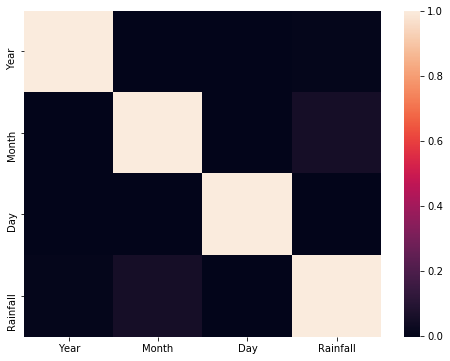

In [25]:
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [26]:
rainfall_df = pd.get_dummies(rainfall)

In [27]:
rainfall_df.head()

,Year,Month,Day,Rainfall,Station_Ambagan_ctg,Station_Barisal,Station_Bhola,Station_Bogra,Station_Chandpur,Station_Chittagong,...,Station_Rangpur,Station_Sandwip,Station_Satkhira,Station_Sitakunda,Station_Srimangal,Station_Sylhet,Station_Tangail,Station_Teknaf,Station_chuadanga,Station_sydpur
StationIndex,,,,,,,,,,,,,,,,,,,,,
1,1970,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = rainfall_df.drop(columns=["Rainfall"])
Y = rainfall_df["Rainfall"]

In [29]:
# split data into random train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [30]:
# fit a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# make predictions
y_pred = regressor.predict(X_test)

In [33]:
# calculate R-squared
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)

print("Linear Regression R-squared: {}".format(lin_r2))

Linear Regression R-squared: 0.013397873694607987


In [34]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 18.664918845750996


In [35]:
# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression MAE: 9.615808390662876


In [36]:
# get feature coefficients
importance = regressor.coef_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X_train.columns[index], (importance[index] )))

Station_Rajshahi : -2.589941244553702
Station_chuadanga : -2.524125753360947
Station_Ishurdi : -2.166234274443788
Station_Jessore : -2.025663891461235
Station_Satkhira : -1.986845988001624
Station_Bogra : -1.848115453622496
Station_Tangail : -1.8174304757799142
Station_Khulna : -1.5512183801735808
Station_Mongla : -1.5078518542394121
Station_Faridpur : -1.4301336825050042
Station_Dinajpur : -1.3836659385486274
Station_Madaripur : -1.0984372554509685
Station_sydpur : -0.9946813001841956
Station_Comilla : -0.9397026322693118
Station_Dhaka : -0.9075446839246214
Station_Chandpur : -0.8876095965440116
Station_Mymensingh : -0.8370574564271622
Station_Barisal : -0.8184685611680269
Station_Rangpur : -0.5282320733898364
Station_Srimangal : -0.3603052805719833
Station_Bhola : -0.2820432487239909
Day : -0.008131753631968157
Year : 0.01261941348066819
Month : 0.29898309099046205
Station_Rangamati : 0.3047765287513946
Station_Patuakhali : 0.3278341263860274
Station_Khepupara : 0.9237530945564417
St

In [37]:

import sklearn
sklearn.__version__

'0.22.2.post1'

In [38]:
# import libraries, we will use GridSearchCV to find the best parameter values
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [ ]:
# fit the model
rf.fit(X_train, y_train)